In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\MACHINE LEARNING\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)\Position_Salaries.csv")

In [3]:
df.head

<bound method NDFrame.head of             Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000>

In [4]:
X=df.iloc[:,1:-1].values
Y=df.iloc[:,-1].values

In [5]:
Y=Y.reshape(len(Y),1)

In [6]:
# Feature Scaling (-3 to +3)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y=StandardScaler()
x = sc_x.fit_transform(X)
y = sc_y.fit_transform(Y)

In [7]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [9]:
from sklearn.svm import SVR

In [10]:
svm_regressor =SVR(kernel='rbf')

In [11]:
svm_regressor.fit(x,y)

c:\users\htcuser.ctlt140\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
sc_y.inverse_transform(svm_regressor.predict(sc_x.transform([[6.5]])))  # inverse transform to get original result after feature scaling

array([170370.0204065])

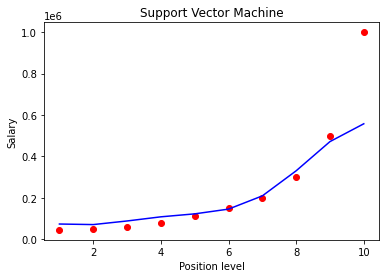

In [14]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(svm_regressor.predict(x)),color='blue')
plt.title("Support Vector Machine")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()
